# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.cluster import KMeans

# Loading the Dataset

In [3]:
df = pd.read_csv(r"C:\Users\DELL\OneDrive\Data Science\class Folder\Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Exploratory Data Analysis

<AxesSubplot:xlabel='Gender', ylabel='count'>

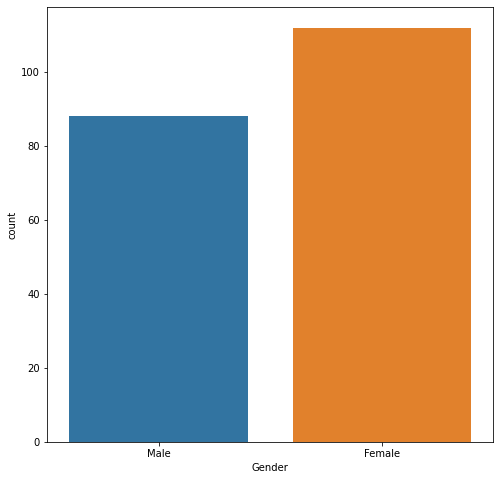

In [4]:
plt.figure(figsize = (8,8))
sns.countplot(x = 'Gender',data  = df)

In [5]:
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

- There are more counts of female than that of male

<Figure size 576x576 with 0 Axes>

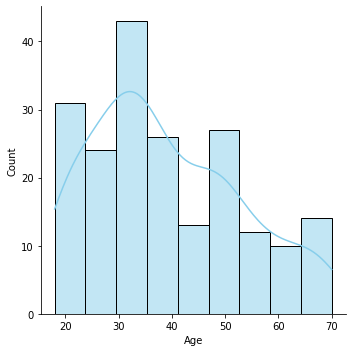

In [6]:
plt.figure(figsize = (8,8))
sns.displot(x = df['Age'],kde = True,color = 'skyblue')

- Age group between 30 - 40 are more.
- After that there are age group of 20 - 25 more visiting the mall.

<AxesSubplot:xlabel='Age', ylabel='Annual Income (k$)'>

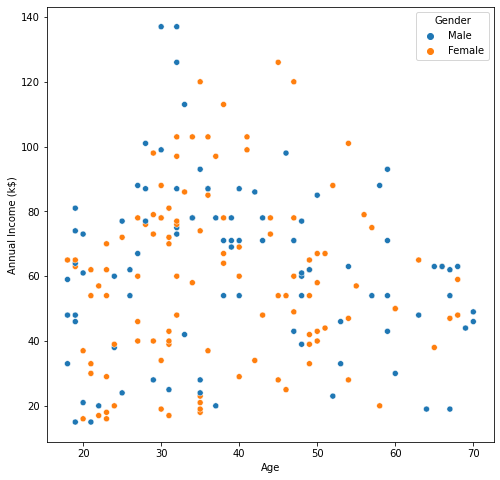

In [7]:
plt.figure(figsize = (8,8))
sns.scatterplot(data = df,x = 'Age', y = 'Annual Income (k$)',hue = 'Gender')

- Age Group between 30 - 50 have higher salary and most of them are male.
- As the age increases the annual salary decreases or it could be they tend to appear less in the mall.

<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>

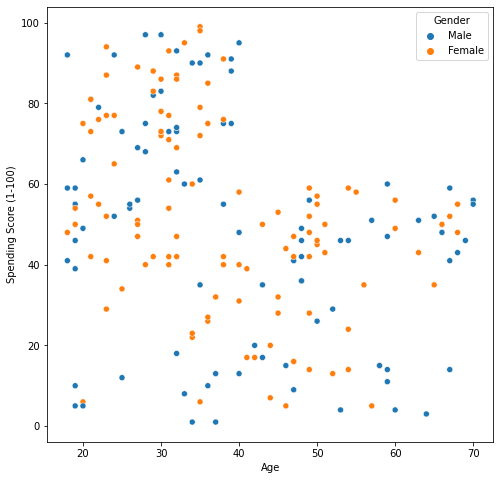

In [9]:
plt.figure(figsize = (8,8))
sns.scatterplot(data = df,x = 'Age', y = 'Spending Score (1-100)',hue = 'Gender')

- Age segment of between 20 - 40 tend to spend more.
- And there is a sudden drop once the person enters the 50s.

# Choosing the Annual Income Column and Spending Score Column

In [12]:
X = df.iloc[:,[3,4]].values

In [13]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

# Choosing the Number of Cluster
- WCSS -> Within Clusters Sum of Squares

In [16]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init = 'k-means++',random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

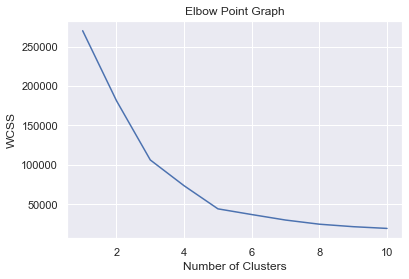

In [18]:
#Plot and elbow graph 

sns.set()
plt.plot(range(1,11),wcss)
plt.title('Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

- So the optimum value for clusters in '5'

# Training the K-Means Clustering

In [20]:
kmeans = KMeans(n_clusters=5, init = 'k-means++',random_state = 42)

Y = kmeans.fit_predict(X)
print(Y)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


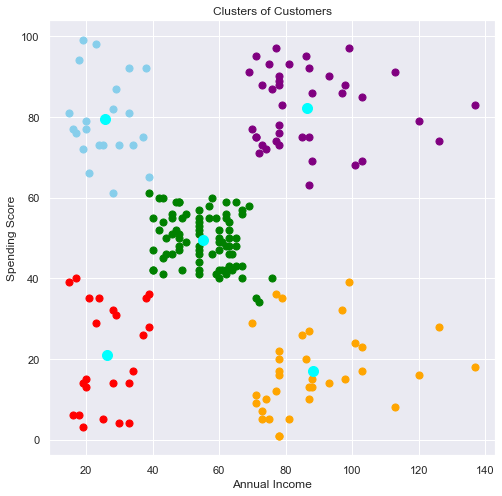

In [34]:
#plotting all the Clusters and their Centroid

plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='orange', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='red', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='skyblue', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='purple', label='Cluster 5')


#plotting the centroids

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('Clusters of Customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

# Insight

- Skyblue cluster is a group of people which does not have a High Annual Income but have a Excellent Spending Score.
- Purple cluster is a group of people have a moderate to high Annual Income and also have a Satisfactory Spending Score.
- Green cluster is a group of people which does have a High Annual Income but tend to spend less and are more saving oriented.
- Red cluster is a group of people which does not have a High Annual Income and also have does not High Spending Score and are our Tier 1 Cluster.
- Orange cluster is a group of people who have a moderate Annual Income and have a Moderate Spending Score to them.

In [35]:
X[Y==0,0], X[Y==0,1]

(array([39, 40, 40, 40, 40, 42, 42, 43, 43, 43, 43, 44, 44, 46, 46, 46, 46,
        47, 47, 48, 48, 48, 48, 48, 48, 49, 49, 50, 50, 54, 54, 54, 54, 54,
        54, 54, 54, 54, 54, 54, 54, 57, 57, 58, 58, 59, 59, 60, 60, 60, 60,
        60, 60, 61, 61, 62, 62, 62, 62, 62, 62, 63, 63, 63, 63, 63, 63, 64,
        64, 65, 65, 65, 65, 67, 67, 67, 67, 69, 71, 72, 76], dtype=int64),
 array([61, 55, 47, 42, 42, 52, 60, 54, 60, 45, 41, 50, 46, 51, 46, 56, 55,
        52, 59, 51, 59, 50, 48, 59, 47, 55, 42, 49, 56, 47, 54, 53, 48, 52,
        42, 51, 55, 41, 44, 57, 46, 58, 55, 60, 46, 55, 41, 49, 40, 42, 52,
        47, 50, 42, 49, 41, 48, 59, 55, 56, 42, 50, 46, 43, 48, 52, 54, 42,
        46, 48, 50, 43, 59, 43, 57, 56, 40, 58, 35, 34, 40], dtype=int64))